In [1]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

In [2]:
#prepare data
da = pd.read_csv("train.csv")
da.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [3]:
da.shape

(8693, 14)

DATA ChECK AND PREPARATION

In [4]:
def check_str(column):
    summary = [0 for i in range (len(da[column]))]
    for i in range(len(da[column])):
        if isinstance(da[column][i],float):
            summary[i] += 1
    total = np.where(pd.Series(summary) > 0,1,0)
    print("in "+column + " total errors: "+ str(np.count_nonzero(total)))
    return total

In [5]:
import math

def check_float(column):
    summary = [0 for i in range (len(da[column]))]
    for i in range(len(da[column])):
        if math.isnan(da[column][i]):
            summary[i] += 1
    total = pd.Series(np.where(pd.Series(summary) > 0,1,0))
    print("in "+column + " total errors: "+ str(np.count_nonzero(total)))
    return total

In [6]:
col_str = ['PassengerId','VIP','Transported','HomePlanet', 'CryoSleep', 'Cabin', 'Destination','Name']
col_float = ['RoomService', 'FoodCourt', 'Age','ShoppingMall', 'Spa', 'VRDeck']

total = pd.Series([0 for i in range (len(da["Age"]))])
for col in col_str:
    total += check_str(col)
for col in col_float:
    total += check_float(col)

np.count_nonzero(total)

in PassengerId total errors: 0
in VIP total errors: 203
in Transported total errors: 0
in HomePlanet total errors: 201
in CryoSleep total errors: 217
in Cabin total errors: 199
in Destination total errors: 182
in Name total errors: 200
in RoomService total errors: 181
in FoodCourt total errors: 183
in Age total errors: 179
in ShoppingMall total errors: 208
in Spa total errors: 183
in VRDeck total errors: 188


2087

In [7]:
def conv(x):
    if(isinstance(x,float)):
        return -1.0
    elif x:
        return 1.0
    else:
        return 0.0

da["VIP"] = pd.Series([conv(vip) for vip in da["VIP"]])
da["CryoSleep"] = pd.Series([conv(sleep) for sleep in da["CryoSleep"]])


In [8]:
def conv_str(x):
    if(isinstance(x,float)):
        return '-'
    else:
        return x

da["HomePlanet"] = pd.Series([conv_str(homeplanet) for homeplanet in da["HomePlanet"]])
da["Destination"] = pd.Series([conv_str(destination) for destination in da["Destination"]])


In [9]:
def conv_float(x):
    if(math.isnan(x)):
        return -1.0
    else:
        return x

for float_column in col_float:
    da[float_column] = pd.Series([conv_float(x) for x in da[float_column]])

In [10]:
def func(txt):
    if isinstance(txt,float):
        return ['-','-']
    else:
        return txt.split(" ")
name_surname = [func(txt) for txt in da["Name"]]
for i in range(len(name_surname)):
    if len(name_surname[i]) !=2:
        print(name_surname[i])
da["First name"] = pd.DataFrame(name_surname)[0]
da["Last name"] = pd.DataFrame(name_surname)[1]

In [11]:
#Lets split Cabin description into separate parts: deck/num/side
#split
def cabin_split(txt):
    if isinstance(txt,float):
        return ['-','-1','-']
    else:
        return txt.split("/")
cabin_array = pd.DataFrame([cabin_split(cabin) for cabin in da["Cabin"]])

Deck = {'A':1.0, 'B':2.0, 'C':3.0, 'D':4.0, 'E':5.0, 'F':6.0, 'G':7.0, 'T':8.0, '-':-1.0}
Side = {'P':1.0, 'S':2.0, '-': -1.0}
cabin_array[0] = pd.Series([Deck[x] for x in cabin_array[0]])
da["Deck"] = cabin_array[0]
cabin_array[1] = pd.Series([float(x) for x in cabin_array[1]])
da["Num"] = cabin_array[1]
cabin_array[2] = pd.Series([Side[x] for x in cabin_array[2]])
da["Side"] = cabin_array[2]

In [12]:
pas_id = pd.DataFrame([txt.split("_") for txt in da["PassengerId"]])
for i in range(len(pas_id.iloc[:,0])):
    pas_id.iloc[i,0] = float(pas_id.iloc[i,0])
for i in range(len(pas_id.iloc[:,1])):
    pas_id.iloc[i,1] = float(pas_id.iloc[i,1])

da["id1"] = pas_id[0]
da["id2"] = pas_id[1]

In [13]:
da["Transported"] = np.where(da["Transported"]==True, 1.0, -1.0)

In [14]:
da.drop("Name", axis = 1, inplace = True)
da.drop("Cabin", axis = 1, inplace = True)
da.drop("PassengerId", axis = 1, inplace = True)
print(da.shape)
da.head()

(8693, 18)


HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa        0.0  TRAPPIST-1e  39.0  0.0          0.0        0.0   
1      Earth        0.0  TRAPPIST-1e  24.0  0.0        109.0        9.0   
2     Europa        0.0  TRAPPIST-1e  58.0  1.0         43.0     3576.0   
3     Europa        0.0  TRAPPIST-1e  33.0  0.0          0.0     1283.0   
4      Earth        0.0  TRAPPIST-1e  16.0  0.0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported First name    Last name  Deck  \
0           0.0     0.0     0.0         -1.0      Maham    Ofracculy   2.0   
1          25.0   549.0    44.0          1.0     Juanna        Vines   6.0   
2           0.0  6715.0    49.0         -1.0     Altark       Susent   1.0   
3         371.0  3329.0   193.0         -1.0      Solam       Susent   1.0   
4         151.0   565.0     2.0          1.0      Willy  Santantines   6.0   

   Num  Side id1 id2  
0  0.0   1.0   1   1  
1  0.0   2.0   2   1  
2  0.0   2.0   3   1  
3  0.0   2.0   3   2  
4  1.0   2.0   4   1

In [15]:
col_str = ['Transported','HomePlanet', 'Destination','First name','Last name']
col_float = ['Deck','Num','Side','CryoSleep','VIP', 'Age','RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck','id1','id2']

total = pd.Series([0 for i in range (len(da["Age"]))])
for col in col_str:
    total += check_str(col)
for col in col_float:
    total += check_float(col)

total.sum()

in Transported total errors: 8693
in HomePlanet total errors: 0
in Destination total errors: 0
in First name total errors: 0
in Last name total errors: 0
in Deck total errors: 0
in Num total errors: 0
in Side total errors: 0
in CryoSleep total errors: 0
in VIP total errors: 0
in Age total errors: 0
in RoomService total errors: 0
in FoodCourt total errors: 0
in ShoppingMall total errors: 0
in Spa total errors: 0
in VRDeck total errors: 0
in id1 total errors: 0
in id2 total errors: 0


8693

In [16]:
def new_undefined_str_count(dx,column):
    sum_ = [0 for _ in dx.index]
    for i in range(len(dx[column])):
        if dx.loc[dx.index[i],column] == '-':
            sum_[i] += 1
    sum_ = pd.Series(sum_)
    print(column + ": total undefined values: "+str(sum_.sum()))
    return sum_

def new_undefined_float_count(dx,column):
    sum_ = [0 for a in dx.index]
    for i in range(len(dx[column])):
        if dx.loc[dx.index[i],column] == -1.0:
            sum_[i] += 1
    sum_ = pd.Series(sum_)
    print(column + ": total undefined values: "+str(sum_.sum()))
    return sum_

def count_undef(dx):
    sum_ = pd.Series([0 for _ in dx.index])
    
    for i in range(len(dx.columns)):
        if dx.columns[i]=="Transported":
            continue
        if isinstance(dx.iloc[0,i],float):
            sum_+=new_undefined_float_count(dx,dx.columns[i])
        else:
            sum_ +=new_undefined_str_count(dx,dx.columns[i])
    print("Total not fully defined records: " + str((sum_>0).sum()))

NOW LET'S FILL THE MISSING DATA IN THE TABLE

In [17]:
df = da

Now let's fill some of the missing data in some columns with

In [18]:
#HomePlanet
surnames = df["Last name"].unique()
len(surnames)

2218

Let's assume one family is represented by one surname , i.e. they are oiginally from one planet

In [19]:
#checking hypothesis
count = 0
for surname in surnames:
    planets=df[df["Last name"] == surname]["HomePlanet"].unique()
    planets = np.delete(planets,np.where(planets == '-'))
    if len(planets) == 1:
        count +=1
percent = 100*count/len(surnames)
print(f"surnames that are originally from single planet percentage : {percent:.2f}%")


surnames that are originally from single planet percentage : 99.59%


In [20]:
surname_from_single_planet = dict()
surname_unknown_origin = []
surname_many_planets = []
many_planets_candidates = []

for surname in surnames:
    family = df[df["Last name"] == surname]
    homeplanets = family["HomePlanet"].unique()
    homeplanets = np.delete(homeplanets,np.where(homeplanets == '-'))
    if len(homeplanets) <= 1:
        if len(homeplanets) ==0:
            surname_unknown_origin.append(surname)
        else:
            surname_from_single_planet[surname] = homeplanets[0] #single choice

    else: #many choices
        surname_many_planets.append(surname)
        many_planets_candidates = homeplanets

percent = 100*len(surname_from_single_planet)/len(surnames)
print(f"surnames that are originally from single planet percentage : {percent:.2f}%")
print(f"surnames that unknown origin # : {len(surname_unknown_origin):d}")
print(f"surnames that originally from many planets # : {len(surname_many_planets):d}")

surnames that are originally from single planet percentage : 99.59%
surnames that unknown origin # : 8
surnames that originally from many planets # : 1


In [21]:
import random # for choosing planets randomly

planets_col = np.array(df["HomePlanet"])
cleaned = np.delete(planets_col,np.where(planets_col == '-'))
planets = np.unique(cleaned)

total_num = len(cleaned)

def planet_prob(planet):
    return np.count_nonzero(cleaned == planet)/total_num

probabilities = [planet_prob(planet) for planet in planets]

planets_prob_dict = {planet: probability for planet, probability in zip(planets,probabilities)}

def get_planet_with_prob(planet_list, random_state = 1):
    probs = pd.Series([planets_prob_dict[planet] for planet in planet_list])
    total = probs.sum()
    probs = [prob/total for prob in probs]
    return random.choices(planet_list, weights=probs, k=1)[0]

In [22]:
planet_random_state = 2

for i in range(len(df["HomePlanet"])):
    if df["HomePlanet"][i] == '-':
        if df["Last name"][i] in surname_from_single_planet:
            df["HomePlanet"][i] = surname_from_single_planet[df["Last name"][i]]
        elif df["Last name"][i] in surname_unknown_origin: #all planets possible
            df["HomePlanet"][i] = get_planet_with_prob(['Earth','Europa','Mars'],random_state = planet_random_state)
            #print("for surname with unknown origin " + df["Last name"][i]+" set planet "+df["HomePlanet"][i])
        else: #many planets - we randomy choose only between the existing planets excluding the missin ones
            list_ = df[df["Last name"]==df["Last name"][i]]["HomePlanet"].unique()
            list_ = np.delete(list_,np.where(list_== '-'))
            df["HomePlanet"][i]  = get_planet_with_prob(list_,random_state=planet_random_state)
            #print("for surname with many origins (below)" + df["Last name"][i]+" set planet "+df["HomePlanet"][i])

(df[df["HomePlanet"] == '-'])["HomePlanet"].count()

<ipython-input-22-61496d7ae375>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomePlanet"][i] = get_planet_with_prob(['Earth','Europa','Mars'],random_state = planet_random_state)
<ipython-input-22-61496d7ae375>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomePlanet"][i] = surname_from_single_planet[df["Last name"][i]]
<ipython-input-22-61496d7ae375>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomePlanet"][i]  

0

In [23]:
dt = df[df["CryoSleep"]==1]
expense = dt['RoomService']+dt['FoodCourt']+dt['ShoppingMall']+dt['Spa']+dt['VRDeck']
(expense >0).sum()

0

Bingo!

In [24]:
df.loc[df["CryoSleep"]==1,'RoomService'] = 0
df.loc[df["CryoSleep"]==1,'FoodCourt'] = 0
df.loc[df["CryoSleep"]==1,'ShoppingMall'] = 0
df.loc[df["CryoSleep"]==1,'Spa'] = 0
df.loc[df["CryoSleep"]==1,'VRDeck'] = 0

if expenses >0 then df.loc[df["CryoSleep"]==-1,'CryoSleep'] = 0

In [25]:
expense = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']
df.loc[(expense > 0)&(df["CryoSleep"]==-1.0),"CryoSleep"] = 0

In [26]:
origin_map = {'Earth':0.0, 'Mars':1.0, 'Europa':2.0}
destination_map = {'55 Cancri e':0.0,'TRAPPIST-1e':1.0,'PSO J318.5-22':2.0}

def route_number(origin,destination):
    if (origin == '-') or (destination == '-'): 
        return -1.0
    else: 
        o = origin_map[origin]
        d = destination_map[destination]
        return o*3+d+1 #range(1,10)

df['route'] = pd.Series([route_number(df["HomePlanet"][i],df["Destination"][i]) for i in range(len(df["HomePlanet"]))])
df.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa        0.0  TRAPPIST-1e  39.0  0.0          0.0        0.0   
1      Earth        0.0  TRAPPIST-1e  24.0  0.0        109.0        9.0   
2     Europa        0.0  TRAPPIST-1e  58.0  1.0         43.0     3576.0   
3     Europa        0.0  TRAPPIST-1e  33.0  0.0          0.0     1283.0   
4      Earth        0.0  TRAPPIST-1e  16.0  0.0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported First name    Last name  Deck  \
0           0.0     0.0     0.0         -1.0      Maham    Ofracculy   2.0   
1          25.0   549.0    44.0          1.0     Juanna        Vines   6.0   
2           0.0  6715.0    49.0         -1.0     Altark       Susent   1.0   
3         371.0  3329.0   193.0         -1.0      Solam       Susent   1.0   
4         151.0   565.0     2.0          1.0      Willy  Santantines   6.0   

   Num  Side id1 id2  route  
0  0.0   1.0   1   1    8.0  
1  0.0   2.0   2   1    2.0  
2  0.0   2.0   3   1    8.0  
3  0.0   2.0   3   2    8.0  
4  1.0   2.0   4   1    2.0

ID2 --> Deck

In [27]:
dt = df[df["Deck"]!=-1.0]
deck = dt["Deck"].values
id2 = dt["id2"].values
arr = pd.Series(zip(id2,deck))
uniq_deck_id2 = arr.unique()
print("unique pairs #:",len(uniq_deck_id2))

def count_pairs(arr,pair):
    c = 0
    for p in arr:
        c+= p==pair
    return c
c = pd.Series([count_pairs(arr,uni) for uni in uniq_deck_id2])
uniq_deck_id2 = pd.Series(uniq_deck_id2)

unique pairs #: 51


LET'S make probability matrix

In [28]:
df["id2"].unique()

array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype=object)

In [29]:
prob_matrix_deck = pd.DataFrame(index=dt["id2"].unique(),columns = dt["Deck"].unique())
unique_index = pd.Index(list(uniq_deck_id2))

for uni in uniq_deck_id2:
    prob_matrix_deck.loc[uni[0],uni[1]] = c[unique_index.get_loc((uni[0],uni[1]))]

prob_matrix_deck

2.0   6.0  1.0   7.0  5.0  4.0  3.0  8.0
1.0  438  2202  147  1857  671  331  432    5
2.0  212   368   64   337  128   97  171  NaN
3.0   69   136   30   182   43   22   69  NaN
4.0   37    40   11    70   18   12   37  NaN
5.0   14    23    3    43   12    9   23  NaN
6.0    5    12    1    38    3    4   12  NaN
7.0    4     9  NaN    23    1    3    3  NaN
8.0  NaN     4  NaN     9  NaN  NaN  NaN  NaN

In [30]:
for i in prob_matrix_deck.index:
    for j in prob_matrix_deck.columns:
        if math.isnan(prob_matrix_deck.loc[i,j]):
            prob_matrix_deck.loc[i,j] = 0

prob_matrix_deck

2.0   6.0  1.0   7.0  5.0  4.0  3.0 8.0
1.0  438  2202  147  1857  671  331  432   5
2.0  212   368   64   337  128   97  171   0
3.0   69   136   30   182   43   22   69   0
4.0   37    40   11    70   18   12   37   0
5.0   14    23    3    43   12    9   23   0
6.0    5    12    1    38    3    4   12   0
7.0    4     9    0    23    1    3    3   0
8.0    0     4    0     9    0    0    0   0

In [31]:
#finally lets make it probailities
sum_ = 0.0
for i in prob_matrix_deck.index:
    for j in prob_matrix_deck.columns:
        sum_ += prob_matrix_deck.loc[i,j]

for i in prob_matrix_deck.index:
    sum_ = prob_matrix_deck.loc[i,:].sum()
    for j in prob_matrix_deck.columns:
            prob_matrix_deck.loc[i,j] /= sum_

prob_matrix_deck

2.0       6.0        1.0       7.0        5.0        4.0  \
1.0  0.0720039  0.361992  0.0241657  0.305277   0.110307  0.0544139   
2.0   0.153958  0.267248  0.0464779  0.244735  0.0929557   0.070443   
3.0   0.125227  0.246824  0.0544465  0.330309  0.0780399  0.0399274   
4.0   0.164444  0.177778  0.0488889  0.311111       0.08  0.0533333   
5.0   0.110236  0.181102   0.023622  0.338583  0.0944882  0.0708661   
6.0  0.0666667      0.16  0.0133333  0.506667       0.04  0.0533333   
7.0  0.0930233  0.209302          0  0.534884  0.0232558  0.0697674   
8.0          0  0.307692          0  0.692308          0          0   

           3.0          8.0  
1.0  0.0710176  0.000821963  
2.0   0.124183            0  
3.0   0.125227            0  
4.0   0.164444            0  
5.0   0.181102            0  
6.0       0.16            0  
7.0  0.0697674            0  
8.0          0            0

In [32]:
def get_deck_with_prob(id2,random_state_deck = 1):
    probs = np.array(prob_matrix_deck.loc[id2,:])
    return random.choices(prob_matrix_deck.columns, weights=probs, k=1)[0]

In [33]:
len(df["id1"].unique())

6217

In [34]:
len(df["Num"].unique())

1818

In [35]:
def tuple_equal_2d(tuple1,tuple2):
    return (tuple1[0]==tuple2[0]) and (tuple1[1] == tuple2[1])

def unique_tuple(array_of_tuples):
    array_uniques = []
    for i in range(len(array_of_tuples)):
        j = 0
        while j < i:
            if tuple_equal_2d(array_of_tuples[i], array_of_tuples[j]):
                break
            else:
                j +=1
        if j == i:
            array_uniques.append(array_of_tuples[i])
    print(len(array_uniques))
    return array_uniques

In [36]:
dt = df[df["Num"]!=-1.0]
num = dt["Num"].values
id1 = dt["id1"].values
arr = pd.Series(zip(id1,num))
uniq_num_id1 = pd.Series(arr.unique())
print(len(uniq_num_id1))

single_id1_to_num = []
id1_to_many_num = []
id1_many = []
num_many = []
for pair in uniq_num_id1:
    if len(dt[dt["id1"] == pair[0]]["Num"].unique())== 1:
        single_id1_to_num.append(pair)
    else:
        id1_to_many_num.append(pair)
        id1_many.append(pair[0])
        num_many.append(pair[1])

id1_many = pd.Series(id1_many)
num_many = pd.Series(num_many)

single_id1_to_num_dict = {id1:num for id1,num in single_id1_to_num}

def count_pairs(arr,pair):
    c = 0
    for p in arr:
        c+= p==pair
    return c
c_ = pd.Series([count_pairs(arr,uni) for uni in id1_to_many_num])

print("singles: ",len(single_id1_to_num))
print("#pairs for matrix: ",len(id1_to_many_num))

6559
singles:  5698
#pairs for matrix:  861


In [37]:
prob_matrix_num = pd.DataFrame(index=list(id1_many.unique()),columns = list(num_many.unique()))
print(prob_matrix_num.shape)
unique_index = pd.Index(list(id1_to_many_num))

for uni in id1_to_many_num:
    prob_matrix_num.loc[uni[0],uni[1]] = c_[unique_index.get_loc((uni[0],uni[1]))]

prob_matrix_num.head()

(420, 680)


2.0    0.0    6.0    14.0   3.0    10.0   15.0   16.0   20.0   19.0    \
6.0       1      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
17.0    NaN      1      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
64.0    NaN    NaN    NaN      1      1    NaN    NaN    NaN    NaN    NaN   
67.0    NaN    NaN    NaN    NaN    NaN      2      1    NaN    NaN    NaN   
91.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN      1      1    NaN   

      ... 291.0  1871.0 1782.0 1487.0 1496.0 1886.0 1888.0 592.0  1507.0  \
6.0   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
17.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
64.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
67.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
91.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

     1894.0  
6.0     NaN  
17.0    NaN  
64.0    NaN  
67.0    NaN  
91.0    NaN  

[5 rows x 680 columns]

In [38]:
for i in prob_matrix_num.index:
    for j in prob_matrix_num.columns:
        if math.isnan(prob_matrix_num.loc[i,j]):
            prob_matrix_num.loc[i,j] = 0

prob_matrix_num.head()

2.0    0.0    6.0    14.0   3.0    10.0   15.0   16.0   20.0   19.0    \
6.0       1      1      0      0      0      0      0      0      0      0   
17.0      0      1      1      0      0      0      0      0      0      0   
64.0      0      0      0      1      1      0      0      0      0      0   
67.0      0      0      0      0      0      2      1      0      0      0   
91.0      0      0      0      0      0      0      0      1      1      0   

      ... 291.0  1871.0 1782.0 1487.0 1496.0 1886.0 1888.0 592.0  1507.0  \
6.0   ...      0      0      0      0      0      0      0      0      0   
17.0  ...      0      0      0      0      0      0      0      0      0   
64.0  ...      0      0      0      0      0      0      0      0      0   
67.0  ...      0      0      0      0      0      0      0      0      0   
91.0  ...      0      0      0      0      0      0      0      0      0   

     1894.0  
6.0       0  
17.0      0  
64.0      0  
67.0      0  
91.0      0  

[5 rows x 680 columns]

In [39]:
for i in prob_matrix_num.index:
    sum_ = prob_matrix_num.loc[i,:].sum()
    for j in prob_matrix_num.columns:
            prob_matrix_num.loc[i,j] /= sum_

prob_matrix_num.head()

2.0    0.0    6.0    14.0   3.0       10.0      15.0   16.0   20.0    \
6.0     0.5    0.5      0      0      0         0         0      0      0   
17.0      0    0.5    0.5      0      0         0         0      0      0   
64.0      0      0      0    0.5    0.5         0         0      0      0   
67.0      0      0      0      0      0  0.666667  0.333333      0      0   
91.0      0      0      0      0      0         0         0    0.5    0.5   

     19.0    ... 291.0  1871.0 1782.0 1487.0 1496.0 1886.0 1888.0 592.0   \
6.0       0  ...      0      0      0      0      0      0      0      0   
17.0      0  ...      0      0      0      0      0      0      0      0   
64.0      0  ...      0      0      0      0      0      0      0      0   
67.0      0  ...      0      0      0      0      0      0      0      0   
91.0      0  ...      0      0      0      0      0      0      0      0   

     1507.0 1894.0  
6.0       0      0  
17.0      0      0  
64.0      0      0  
67.0      0      0  
91.0      0      0  

[5 rows x 680 columns]

In [40]:
def get_num_with_prob(id1,random_state_num = 1):
    if id1 in list(id1_many.unique()):
        probs = prob_matrix_num.loc[id1,:]
        return random.choices(prob_matrix_num.columns, weights=probs, k=1)[0]
    elif id1 in list(single_id1_to_num_dict.keys()):
        return single_id1_to_num_dict[id1]
    else:
        return -1.0


Now let's map Deck & Num

In [41]:
random_state_deck = 1
random_state_num = 1

for i in range(len(df["Deck"])):
    if(df["Deck"][i]==-1.0):
        df.loc[i,"Deck"] = get_deck_with_prob(df["id2"][i],random_state_deck)

for i in range(len(df["Num"])):
    if(df["Num"][i]==-1.0):
        df.loc[i,"Num"] = get_num_with_prob(df["id1"][i],random_state_num)

Let's see VIP:

In [42]:
count = 0
unknown = 0
mix = 0
vip_surnames = []
no_vip_surnames = []
mix_surnames = []

for surname in surnames:
    matrix = df[df["Last name"] == surname]
    t=matrix["VIP"].unique()
    t = np.delete(t,np.where(t == -1))
    if len(t) == 1:
        count +=1
        if(t[0]==1):
            vip_surnames.append(surname)
        else:
            no_vip_surnames.append(surname)
    elif len(t) == 0:
        unknown +=1
    else:
        mix +=1
        mix_surnames.append(surname)

percent = 100*count/len(surnames)
print(f"surnames that VIP/non VIP together : {percent:.2f}%")
percent = 100*unknown/len(surnames)
print(f"surnames that have totally unknown VIP status : {percent:.2f}%")
percent = 100*mix/len(surnames)
print(f"surnames that have mix VIP status : {percent:.2f}%")

surnames that VIP/non VIP together : 92.06%
surnames that have totally unknown VIP status : 0.32%
surnames that have mix VIP status : 7.62%


In [43]:
pd.crosstab(df["VIP"],df["Deck"])

Deck  1.0  2.0  3.0  4.0  5.0   6.0   7.0  8.0
VIP                                           
-1.0    6   12   20    9   15    73    68    0
 0.0  220  740  700  448  871  2753  2554    5
 1.0   36   43   41   32   16    30     1    0

In [44]:
for i in range(len(df["VIP"])):
    if df["VIP"][i] == -1:
        if df["Last name"][i] in vip_surnames:
            df["VIP"][i] = 1
        elif df["Last name"][i] in no_vip_surnames:
            df["VIP"][i] = 0
        elif df['Deck'][i] > 5:
            df["VIP"][i] = 0
        else:
            df["VIP"][i] = -1

<ipython-input-44-716ee42ff474>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = 0
<ipython-input-44-716ee42ff474>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = 0
<ipython-input-44-716ee42ff474>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = -1


In [45]:
df.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa        0.0  TRAPPIST-1e  39.0  0.0          0.0        0.0   
1      Earth        0.0  TRAPPIST-1e  24.0  0.0        109.0        9.0   
2     Europa        0.0  TRAPPIST-1e  58.0  1.0         43.0     3576.0   
3     Europa        0.0  TRAPPIST-1e  33.0  0.0          0.0     1283.0   
4      Earth        0.0  TRAPPIST-1e  16.0  0.0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported First name    Last name  Deck  \
0           0.0     0.0     0.0         -1.0      Maham    Ofracculy   2.0   
1          25.0   549.0    44.0          1.0     Juanna        Vines   6.0   
2           0.0  6715.0    49.0         -1.0     Altark       Susent   1.0   
3         371.0  3329.0   193.0         -1.0      Solam       Susent   1.0   
4         151.0   565.0     2.0          1.0      Willy  Santantines   6.0   

   Num  Side id1 id2  route  
0  0.0   1.0   1   1    8.0  
1  0.0   2.0   2   1    2.0  
2  0.0   2.0   3   1    8.0  
3  0.0   2.0   3   2    8.0  
4  1.0   2.0   4   1    2.0

<AxesSubplot:xlabel='route', ylabel='count'>

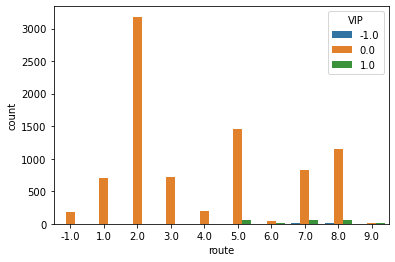

In [46]:
sb.countplot(x = df["route"], hue = df["VIP"])

#VIP ==1 ==> route in [5,6,7,8,9] 

In [47]:
pd.crosstab(df["Deck"],df["route"])

route  -1.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0
Deck                                                             
1.0       4     2     0     0     1     2     0   108   143     2
2.0      17     0     6     1     0     1     0   338   429     3
3.0      12     1     2     3     0     1     0   321   408    13
4.0      11     0     4     1    47   214    17    66   128     1
5.0      25    48   322    31    21   305    14    50    86     0
6.0      67   278  1139   225   128   982    20    11     6     0
7.0      46   371  1709   465     0    13     0     9    10     0
8.0       0     0     0     0     0     0     0     0     5     0

In [48]:
prob_matrix_deck_to_route_vip_0 = pd.DataFrame(index = range(1,9), columns = range(1,10))
prob_matrix_deck_to_route_vip_1 = pd.DataFrame(index = range(1,8), columns = range(5,10))

for i in range(1,9):
    dt = df[(df["Deck"] ==i)&(df["VIP"] ==0)]
    counts = [len(dt[dt['route']==j]['route']) for j in range(1,10)]
    Sum = sum(counts)
    if Sum >0:
        probs = [counts[k]/Sum for k in range(9)]
        prob_matrix_deck_to_route_vip_0.loc[i,:] = probs
    else:
        prob_matrix_deck_to_route_vip_1.loc[i,:] = 0

for i in range(1,8):
    dt = df[(df["Deck"] ==i)&(df["VIP"] ==1)]
    counts = [len(dt[dt['route']==j]['route']) for j in range(5,10)]
    Sum = sum(counts)
    if Sum >0:
        probs = [counts[k]/Sum for k in range(5)]
        prob_matrix_deck_to_route_vip_1.loc[i,:] = probs
    else:
        prob_matrix_deck_to_route_vip_1.loc[i,:] = 0



In [49]:
prob_matrix_deck_to_route_vip_0

1           2           3           4           5          6  \
1  0.00909091           0           0  0.00454545  0.00909091          0   
2           0  0.00818554  0.00136426           0  0.00136426          0   
3  0.00141844  0.00283688  0.00425532           0  0.00141844          0   
4           0  0.00898876  0.00224719    0.105618    0.433708  0.0314607   
5   0.0558789    0.374854   0.0360885    0.024447     0.33993  0.0139697   
6    0.100761    0.412831   0.0815513   0.0463936    0.346865  0.0057992   
7    0.144022    0.663432    0.180512           0  0.00504658          0   
8           0           0           0           0           0          0   

            7           8           9  
1    0.418182    0.554545  0.00454545  
2    0.424284    0.563438  0.00136426  
3    0.429787    0.550355  0.00992908  
4    0.137079    0.280899           0  
5   0.0558789   0.0989523           0  
6   0.0036245   0.0021747           0  
7  0.00310559  0.00388199           0  
8           0           1           0

In [50]:
prob_matrix_deck_to_route_vip_1

5         6          7         8          9
1         0         0   0.444444  0.527778  0.0277778
2         0         0   0.595238  0.357143   0.047619
3         0         0        0.4      0.45       0.15
4     0.625   0.09375    0.15625   0.09375    0.03125
5    0.8125    0.0625     0.0625    0.0625          0
6  0.833333  0.133333  0.0333333         0          0
7         0         0          1         0          0

In [51]:
def get_route_with_prob(vip,deck,random_state_deck = 1):
    if vip ==-1.0 or deck == -1.0:
        return -1.0
    if vip:
        if deck == 8.0:
            return -1.0
        probs = np.array(prob_matrix_deck_to_route_vip_1.loc[deck,:])
        return random.choices(prob_matrix_deck_to_route_vip_1.columns, weights=probs, k=1)[0]
    else:
        probs = np.array(prob_matrix_deck_to_route_vip_0.loc[deck,:])
        return random.choices(prob_matrix_deck_to_route_vip_0.columns, weights=probs, k=1)[0]

In [52]:
dtmp = df
dtmp.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa        0.0  TRAPPIST-1e  39.0  0.0          0.0        0.0   
1      Earth        0.0  TRAPPIST-1e  24.0  0.0        109.0        9.0   
2     Europa        0.0  TRAPPIST-1e  58.0  1.0         43.0     3576.0   
3     Europa        0.0  TRAPPIST-1e  33.0  0.0          0.0     1283.0   
4      Earth        0.0  TRAPPIST-1e  16.0  0.0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported First name    Last name  Deck  \
0           0.0     0.0     0.0         -1.0      Maham    Ofracculy   2.0   
1          25.0   549.0    44.0          1.0     Juanna        Vines   6.0   
2           0.0  6715.0    49.0         -1.0     Altark       Susent   1.0   
3         371.0  3329.0   193.0         -1.0      Solam       Susent   1.0   
4         151.0   565.0     2.0          1.0      Willy  Santantines   6.0   

   Num  Side id1 id2  route  
0  0.0   1.0   1   1    8.0  
1  0.0   2.0   2   1    2.0  
2  0.0   2.0   3   1    8.0  
3  0.0   2.0   3   2    8.0  
4  1.0   2.0   4   1    2.0

In [53]:
for i in range(len(dtmp["route"])):
    if dtmp["route"][i] == -1.0:
        route_predicted = get_route_with_prob(dtmp["VIP"][i],dtmp["Deck"][i])
        dtmp.loc[i,"route"] = route_predicted
dtmp.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa        0.0  TRAPPIST-1e  39.0  0.0          0.0        0.0   
1      Earth        0.0  TRAPPIST-1e  24.0  0.0        109.0        9.0   
2     Europa        0.0  TRAPPIST-1e  58.0  1.0         43.0     3576.0   
3     Europa        0.0  TRAPPIST-1e  33.0  0.0          0.0     1283.0   
4      Earth        0.0  TRAPPIST-1e  16.0  0.0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported First name    Last name  Deck  \
0           0.0     0.0     0.0         -1.0      Maham    Ofracculy   2.0   
1          25.0   549.0    44.0          1.0     Juanna        Vines   6.0   
2           0.0  6715.0    49.0         -1.0     Altark       Susent   1.0   
3         371.0  3329.0   193.0         -1.0      Solam       Susent   1.0   
4         151.0   565.0     2.0          1.0      Willy  Santantines   6.0   

   Num  Side id1 id2  route  
0  0.0   1.0   1   1    8.0  
1  0.0   2.0   2   1    2.0  
2  0.0   2.0   3   1    8.0  
3  0.0   2.0   3   2    8.0  
4  1.0   2.0   4   1    2.0

In [54]:
count_undef(dtmp)

HomePlanet: total undefined values: 0
CryoSleep: total undefined values: 98
Destination: total undefined values: 182
Age: total undefined values: 179
VIP: total undefined values: 12
RoomService: total undefined values: 113
FoodCourt: total undefined values: 113
ShoppingMall: total undefined values: 112
Spa: total undefined values: 118
VRDeck: total undefined values: 126
First name: total undefined values: 200
Last name: total undefined values: 200
Deck: total undefined values: 0
Num: total undefined values: 99
Side: total undefined values: 199
id1: total undefined values: 0
id2: total undefined values: 0
route: total undefined values: 0
Total not fully defined records: 1357


In [55]:
dtmp.drop(["HomePlanet","Destination","First name","Last name","id1","id2"], axis = 1, inplace = True)
dtmp.head()

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0        0.0  39.0  0.0          0.0        0.0           0.0     0.0     0.0   
1        0.0  24.0  0.0        109.0        9.0          25.0   549.0    44.0   
2        0.0  58.0  1.0         43.0     3576.0           0.0  6715.0    49.0   
3        0.0  33.0  0.0          0.0     1283.0         371.0  3329.0   193.0   
4        0.0  16.0  0.0        303.0       70.0         151.0   565.0     2.0   

   Transported  Deck  Num  Side  route  
0         -1.0   2.0  0.0   1.0    8.0  
1          1.0   6.0  0.0   2.0    2.0  
2         -1.0   1.0  0.0   2.0    8.0  
3         -1.0   1.0  0.0   2.0    8.0  
4          1.0   6.0  1.0   2.0    2.0

In [56]:
count_undef(dtmp)

CryoSleep: total undefined values: 98
Age: total undefined values: 179
VIP: total undefined values: 12
RoomService: total undefined values: 113
FoodCourt: total undefined values: 113
ShoppingMall: total undefined values: 112
Spa: total undefined values: 118
VRDeck: total undefined values: 126
Deck: total undefined values: 0
Num: total undefined values: 99
Side: total undefined values: 199
route: total undefined values: 0
Total not fully defined records: 1019


In [57]:
d_clean = dtmp[(dtmp['CryoSleep']>=0)&(dtmp['Age']>=0)&(dtmp['VIP']>=0)&(dtmp['RoomService']>=0)&(dtmp['FoodCourt']>=0)&(dtmp['ShoppingMall']>=0)&(dtmp['Spa']>=0)&(dtmp['VRDeck']>=0)&(dtmp['Num']>=0)&(dtmp['Side']>=0)]
d_clean.shape

(7674, 13)

In [67]:
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']


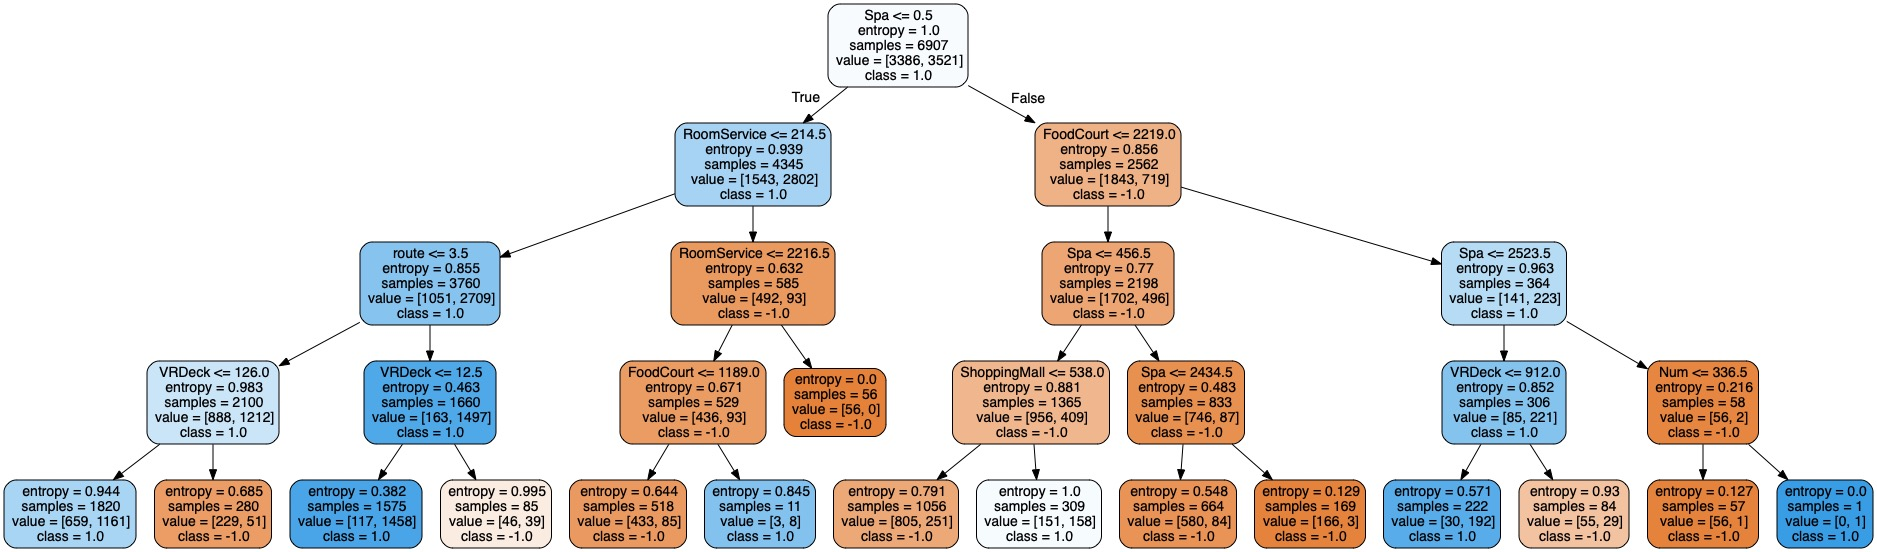

test size:  767 , total errors in test: 20.73%
index = predicted, columns = factual, in %:
         -1        1
-1  32.9857  8.73533
 1  11.9948  46.2842


In [68]:
data_exploration_tree = ds.divide_frame(dataf = d_clean,columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 5, random_state_sample = 5,random_state_ppn = 2, fraction = 0.9)

3100 samples out of 7674 (~40%) have entropy around 0,5 or below whhich corrresponds to morer than 85% precision rate:

731: [FoodCourt <= 3862.5, Spa <= 537.5, RoomService <= 346.5, CryoSleep <=0.5] ==> class -1.0, [647,84]
1016:[ShoppingMall <= 1319.5, FoodCourt <= 1173.5, RoomService > 346.5, CryoSleep <=0.5] ==> class -1.0 [887,129]
1353:[route >3.5,CryoSleep >0.5] ==> class 1.0 [61,1292]

also carefully look on:
833: [Spa > 456.5, FoodCourt <= 2219.0] ==> Class -1.0, [746,87]
1575:[Spa <=0.5, RoomSevice <= 214.5, route > 3.5, VRDeck <=12.5]==> Class 1.0 [117,1458]

274 mistakes gives 91% precision

Let's divide matrix to 2 - one is with low entrropy and one with high

Let's divide matrix by Side, VIP, CryoSleep, since this parameterrs has only 2 values each

In [57]:
import ds

col_s = ["FoodCourt","Spa"]
dz = dtmp[col_s+["Transported"]]
dz = dz[(dz["FoodCourt"]>0)&(dz["Spa"]>0)]

FoodCourt_mean = dz["FoodCourt"].mean()
FoodCourt_sigma = dz["FoodCourt"].std()

Spa_mean = dz["Spa"].mean()
Spa_sigma = dz["Spa"].std()

for i in dz.index:
    dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
    dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma

print(dz.shape)

(2037, 3)


/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transported', ylabel='count'>

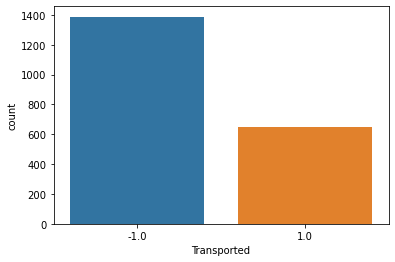

In [58]:
sb.countplot(dz["Transported"])

test size:  611 , total errors in test: 27.33%
index = predicted, columns = factual, in %:
         -1        1
-1  52.5368  13.5843
 1   13.748  20.1309


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


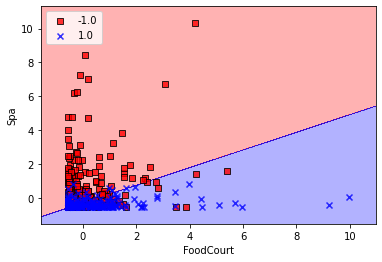

In [59]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Perceptron', random_state_sample = 2,random_state_ppn = 1, fraction = 0.7, eta = 0.0001, iter = 300,plot = True, res =0.01)

In [60]:
ppn_test.w_

array([-0.00015655,  0.00029362, -0.00056401])

test size:  204 , total errors in test: 24.02%
index = predicted, columns = factual, in %:
         -1        1
-1  63.2353  20.5882
 1  3.43137  12.7451


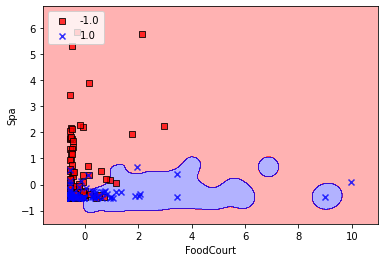

In [61]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'rbf', gamma_ = 5, c=1, degree_ = 3, random_state_sample = 1,random_state_ppn = 1, fraction = 0.9, eta = 0.0001, iter = 300,plot = True, res =0.01)

test size:  204 , total errors in test: 29.90%
index = predicted, columns = factual, in %:
         -1        1
-1  66.6667   29.902
 1        0  3.43137


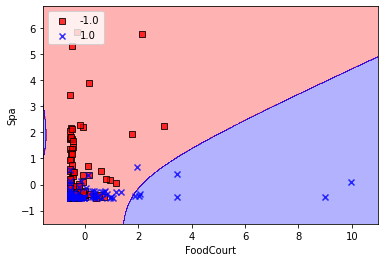

In [89]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'poly', gamma_ = 0.1, c=2, degree_ = 2, random_state_sample = 1,random_state_ppn = 1, fraction = 0.9,plot = True, res =0.01)

test size:  611 , total errors in test: 25.86%
index = predicted, columns = factual, in %:
         -1        1
-1  62.8478  22.4223
 1  3.43699   11.293


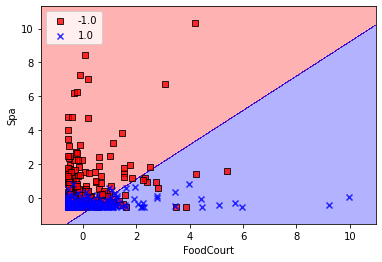

In [106]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'linear', gamma_ = 1, c=2, random_state_sample = 2,random_state_ppn = 3, fraction = 0.7,plot = True, res =0.01)

test size:  204 , total errors in test: 28.43%
index = predicted, columns = factual, in %:
         -1        1
-1  62.2549  24.0196
 1  4.41176  9.31373


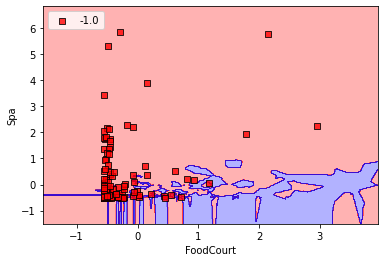

In [102]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'KNN', dimension = 2, neighbors =3, random_state_sample = 1,random_state_ppn = 1, fraction = 0.9, plot = True, res =0.01, show_value = -1)

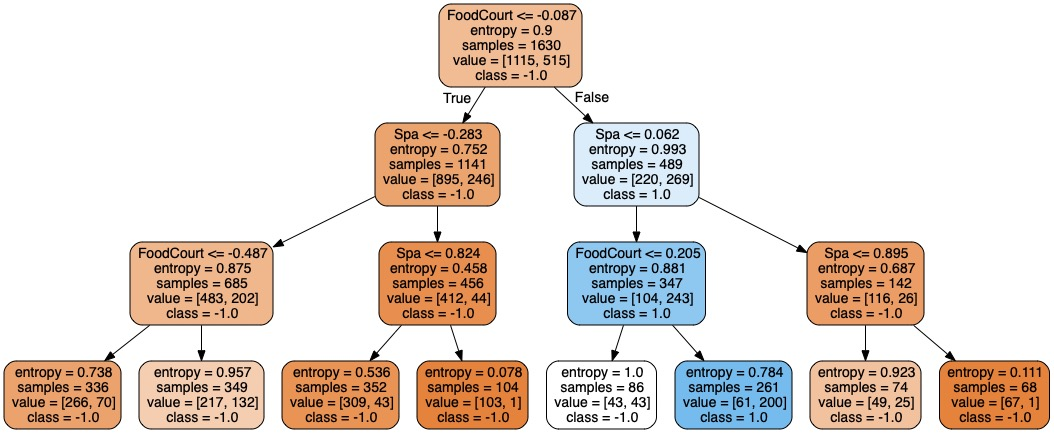

test size:  407 , total errors in test: 25.55%
index = predicted, columns = factual, in %:
         -1        1
-1  62.6536  21.1302
 1   4.4226  11.7936


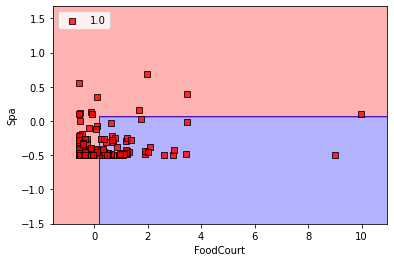

In [101]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 3, random_state_sample = 1,random_state_ppn = 2, fraction = 0.8,plot = True, res = 0.01, show_value = 1)

test size:  611 , total errors in test: 28.64%
index = predicted, columns = factual, in %:
         -1        1
-1  63.6661  26.0229
 1  2.61866  7.69231


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


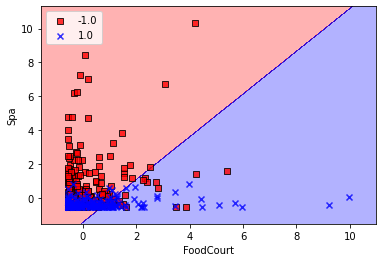

In [73]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Adaline', random_state_sample = 2,random_state_ppn = 3, fraction = 0.7, eta = 0.0001, iter = 150,plot = True, res = 0.01)

In [64]:
ppn_test.w_

array([-0.37731432,  0.33315656, -0.26410552])

test size:  552 , total errors in test: 23.19%
index = predicted, columns = factual, in %:
         -1        1
-1  71.3768  20.1087
 1  3.07971  5.43478


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


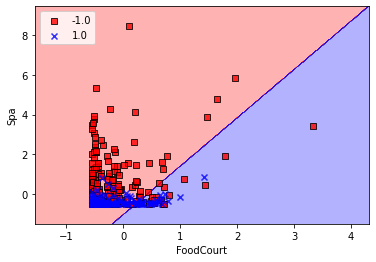

In [65]:
prediction = ppn_test.predict(dz[col_s])

d_tmp = dz[prediction == -1.0]

ppn_test_1= ds.divide_frame(dataf = d_tmp,columns = col_s,teacher_column = "Transported",classifier = 'Perceptron', random_state_sample = 3, random_state_ppn = 2, fraction = 0.7, eta = 0.0001, iter = 150,plot = True, res = 0.01)

(185, 3)


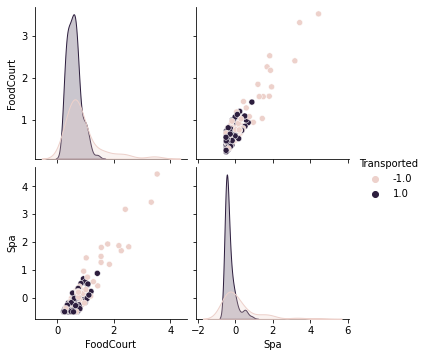

In [66]:
prediction = ppn_test_1.predict(d_tmp[col_s])

d_tmp = d_tmp[prediction == 1.0]

print(d_tmp.shape)

sb.pairplot(d_tmp,hue = "Transported")

#ppn_test_2= ds.divide_frame(dataf = d_tmp,columns = col_s,teacher_column = "Transported",classifier = 'Adaline', random_state_sample = 3, random_state_ppn = 2, fraction = 0.7, eta = 0.0001, iter = 150,plot = True, res = 0.01)

In [67]:
dr = dtmp[(dtmp["Side"]==1.0)&(dtmp["CryoSleep"]==0.0)]
dr.drop(['VIP','Side','CryoSleep'],axis = 1, inplace = True)
dr.shape

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(2734, 10)

In [68]:
count_undef(dr)

Age: total undefined values: 43
RoomService: total undefined values: 65
FoodCourt: total undefined values: 54
ShoppingMall: total undefined values: 61
Spa: total undefined values: 56
VRDeck: total undefined values: 56
Deck: total undefined values: 0
Num: total undefined values: 0
route: total undefined values: 0
Total not fully defined records: 325


In [69]:
dr = dr[(dr['FoodCourt']>=0)&(dr['Spa']>=0)&(dr['Age']>=0)&(dr['RoomService']>=0)&(dr['VRDeck']>=0)&(dr['ShoppingMall']>=0)]
dr.shape

(2409, 10)

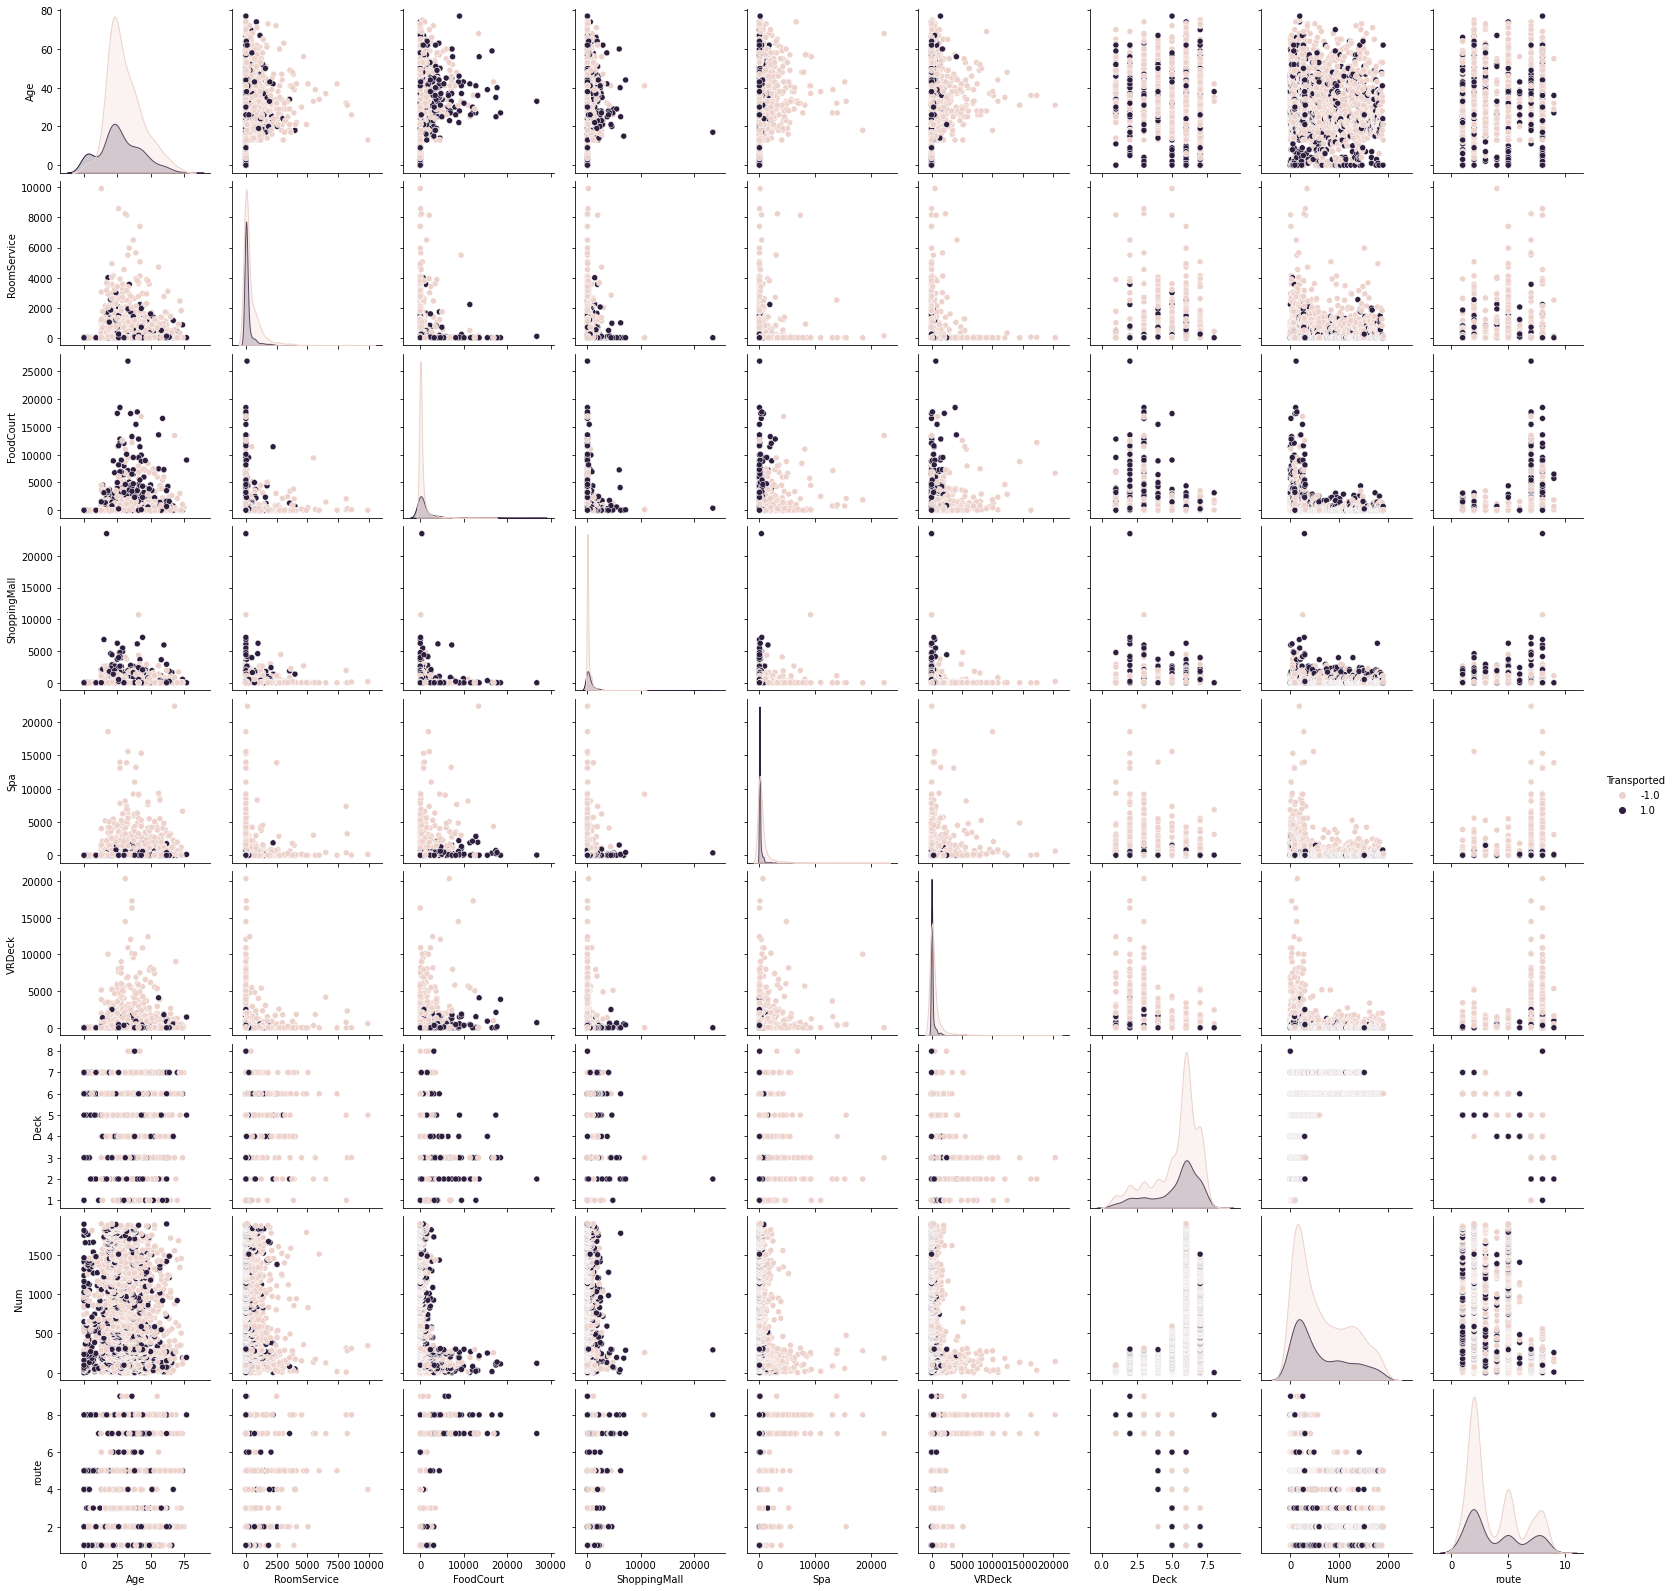

In [70]:

sb.pairplot(dr, hue = "Transported")


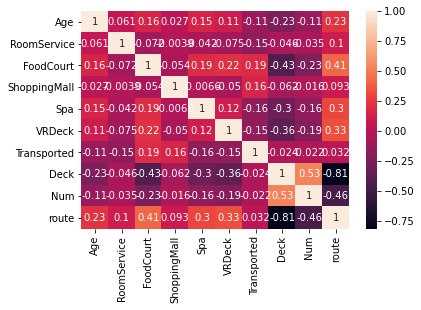

In [71]:
corrMatrix = dr.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

1) "VIP"==0.0 "Side"==1.0 "CryoSleep"==0.0 ==> FoodCourt + Spa + RoomService + VRDeck ==> Transported/Not

In [72]:
dr_=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]
dr_.shape

(2156, 10)

In [73]:
cols = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]

for col in cols:
    m = dr_[col].median()
    for i in dr_.index:
        dr_.loc[i,col] /= m


/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-73-7560ec4de65b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m


In [74]:

ppn1 = ds.divide_frame(dataf = dr_,columns = cols,teacher_column = "Transported",random_state_sample = 1,random_state_ppn = 4, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

test size:  647 , total errors in test: 18.55%
index = predicted, columns = factual, in %:
         -1        1
-1  67.8516  9.73725
 1  8.80989  13.6012


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


In [75]:
ppn1.w_

array([-42.27949438,   5.21414237,  -6.34995909,  -7.60750846,
         0.58915032,  -9.92144577])

In [76]:
col_s = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]
dz=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]
print(dz.shape)

FoodCourt_mean = dz["FoodCourt"].median()
FoodCourt_sigma = dz["FoodCourt"].std()

Spa_mean = dz["Spa"].median()
Spa_sigma = dz["Spa"].std()

RoomService_mean = dz["RoomService"].median()
RoomService_sigma = dz["RoomService"].std()

ShoppingMall_mean = dz["ShoppingMall"].median()
ShoppingMall_sigma = dz["ShoppingMall"].std()

VRDeck_mean = dz["VRDeck"].median()
VRDeck_sigma = dz["VRDeck"].std()

for i in dz.index:
    dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
    dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma
    dz.loc[i,"RoomService"] = (dz.loc[i,"RoomService"] - RoomService_mean)/RoomService_sigma
    dz.loc[i,"ShoppingMall"] = (dz.loc[i,"ShoppingMall"] - ShoppingMall_mean)/ShoppingMall_sigma
    dz.loc[i,"VRDeck"] = (dz.loc[i,"VRDeck"] - VRDeck_mean)/VRDeck_sigma

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-76-638fbbb9783a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
<ipython-input-76-638fbbb9783a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,"Spa"] = (d

(2156, 10)


In [77]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Adaline', random_state_sample = 1,random_state_ppn = 1, fraction = 0.7, eta = 0.0001, iter = 50,plot = False, res = 0.1)

test size:  647 , total errors in test: 20.40%
index = predicted, columns = factual, in %:
         -1        1
-1   75.425  19.1654
 1  1.23648  4.17311


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


In [78]:
ppn_test.w_

array([-0.50998958,  0.26393278, -0.14977735, -0.10796841,  0.22100382,
       -0.15739828])

In [79]:
error = ppn1.predict(dr_.loc[:,cols])!=dr_.loc[:,"Transported"]
error.sum()/len(error)

0.1841372912801484

In [80]:
dr_=dr[(dr["FoodCourt"]<=1)&(dr["Spa"]<=1)&(dr["RoomService"]<=1)&(dr["VRDeck"]<=1)]
dr_.shape

(253, 10)

<AxesSubplot:>

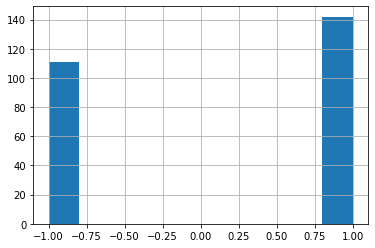

In [81]:
dr_["Transported"].hist()

#let's decide it is all Transported

In [82]:
dr = dtmp[(dtmp["Side"]==2.0)&(dtmp["CryoSleep"]==0.0)]
dr.drop(['Side','CryoSleep'],axis = 1, inplace = True)
dr.shape

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(2711, 11)

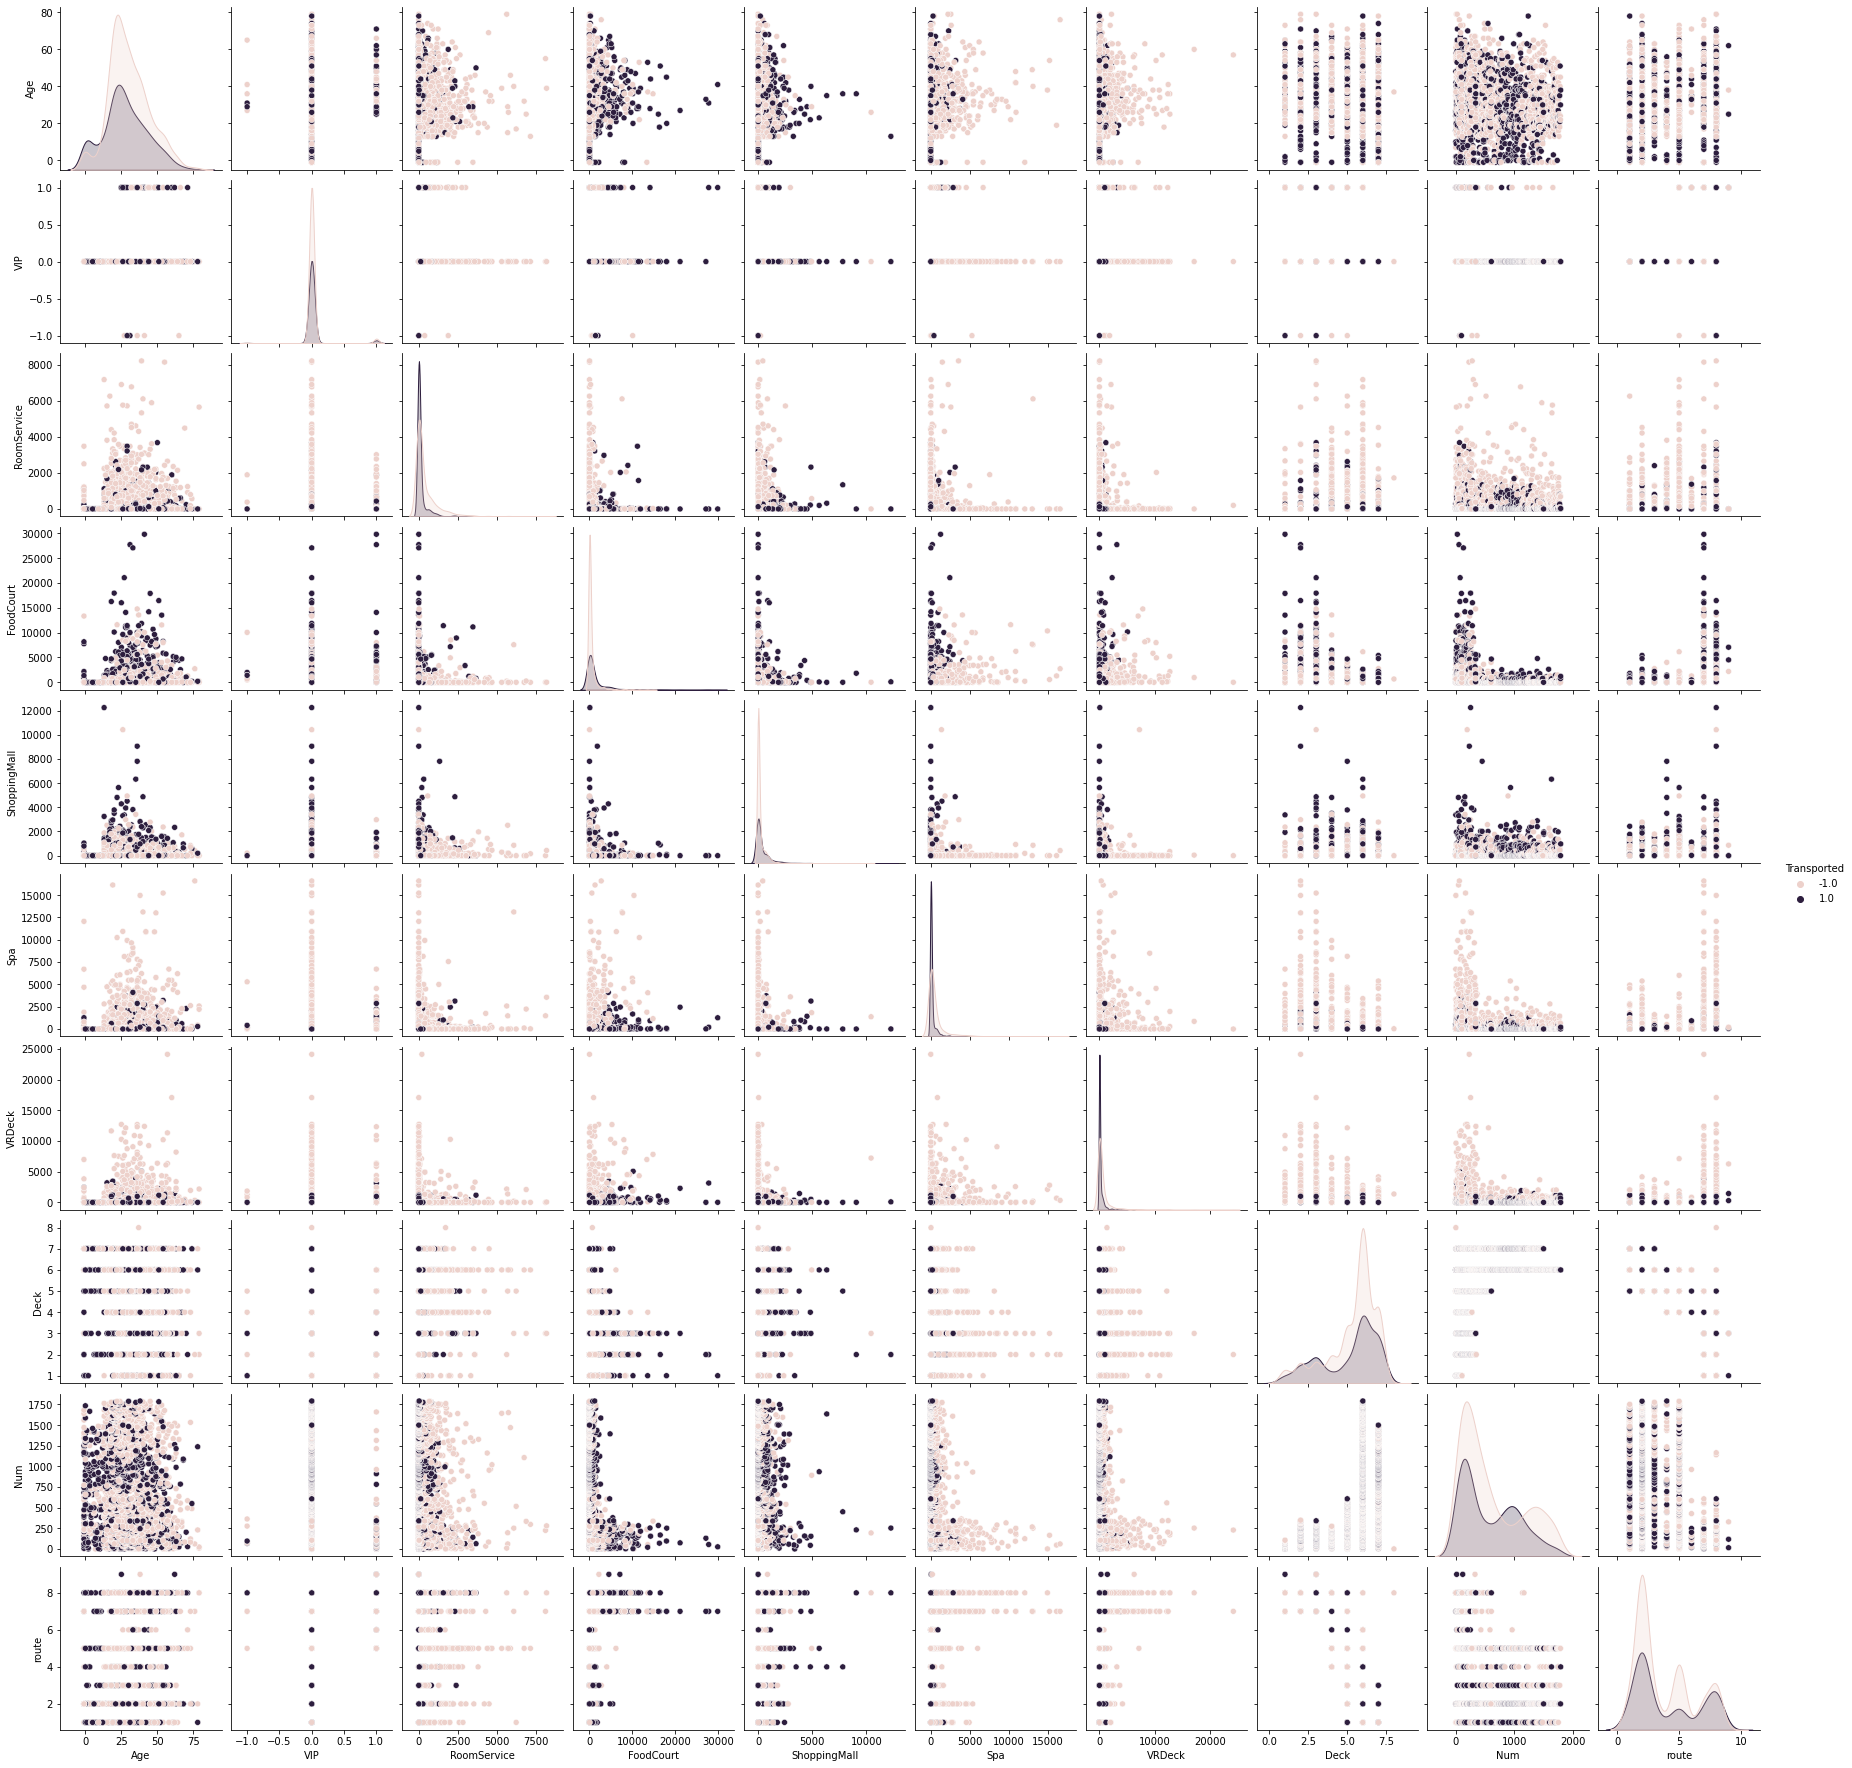

In [83]:
sb.pairplot(dr,hue = "Transported")

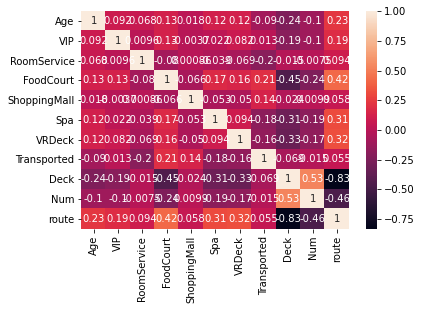

In [84]:
corrMatrix = dr.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

In [85]:
dr_=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]
dr_.shape

(2409, 11)

In [86]:
cols = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]

for col in cols:
    m = dr_[col].median()
    for i in dr_.index:
        dr_.loc[i,col] /= m


/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-86-7560ec4de65b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m


In [87]:
ppn2 = ds.divide_frame(dataf = dr_,columns = cols,teacher_column = "Transported",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

test size:  723 , total errors in test: 23.24%
index = predicted, columns = factual, in %:
         -1        1
-1  50.7607  10.7884
 1  12.4481  26.0028


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


In [88]:
error = ppn2.predict(dr_.loc[:,cols])!=dr_.loc[:,"Transported"]
error.sum()/len(error)

0.23619759236197593

In [89]:
col_s = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]
dz=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]
print(dz.shape)

FoodCourt_mean = dz["FoodCourt"].median()
FoodCourt_sigma = dz["FoodCourt"].std()

Spa_mean = dz["Spa"].median()
Spa_sigma = dz["Spa"].std()

RoomService_mean = dz["RoomService"].median()
RoomService_sigma = dz["RoomService"].std()

ShoppingMall_mean = dz["ShoppingMall"].median()
ShoppingMall_sigma = dz["ShoppingMall"].std()

VRDeck_mean = dz["VRDeck"].median()
VRDeck_sigma = dz["VRDeck"].std()

for i in dz.index:
    dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
    dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma
    dz.loc[i,"RoomService"] = (dz.loc[i,"RoomService"] - RoomService_mean)/RoomService_sigma
    dz.loc[i,"ShoppingMall"] = (dz.loc[i,"ShoppingMall"] - ShoppingMall_mean)/ShoppingMall_sigma
    dz.loc[i,"VRDeck"] = (dz.loc[i,"VRDeck"] - VRDeck_mean)/VRDeck_sigma

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-89-638fbbb9783a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
<ipython-input-89-638fbbb9783a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,"Spa"] = (d

(2409, 11)


In [90]:
ppn2_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = "Adaline",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.00001, iter = 500,plot = False, res = 0.1)

test size:  723 , total errors in test: 27.94%
index = predicted, columns = factual, in %:
          -1        1
-1    62.379  27.1093
 1  0.829876  9.68188


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


In [91]:
ppn2_test.w_

array([-0.2804032 ,  0.2770763 , -0.19398925, -0.16336882,  0.1391557 ,
       -0.16503556])

In [92]:
arr = (dr_["Num"]>750) & (dr_["Num"]<1250)
dr_["newNum"] = np.where(arr,1.0,0.0)


<ipython-input-92-f3f23b7365c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_["newNum"] = np.where(arr,1.0,0.0)


/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newNum', ylabel='count'>

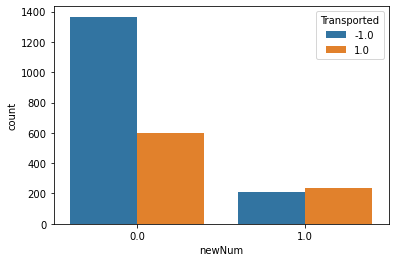

In [93]:
sb.countplot(dr_["newNum"], hue = dr_["Transported"])

In [94]:
ppn2 = ds.divide_frame(dataf = dr_,columns = cols+["newNum"],teacher_column = "Transported",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

test size:  723 , total errors in test: 23.10%
index = predicted, columns = factual, in %:
         -1        1
-1  49.6542  9.54357
 1  13.5546  27.2476


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


In [95]:
error = ppn2.predict(dr_.loc[:,cols+["newNum"]])!=dr_.loc[:,"Transported"]
error.sum()/len(error)

0.22955583229555832

In [96]:
col_s = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]
dz=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]

arr = (dz["Num"]>750) & (dz["Num"]<1250)
dz["newNum"] = np.where(arr,1.0,0.0)
print(dz.shape)

FoodCourt_mean = dz["FoodCourt"].median()
FoodCourt_sigma = dz["FoodCourt"].std()

Spa_mean = dz["Spa"].median()
Spa_sigma = dz["Spa"].std()

RoomService_mean = dz["RoomService"].median()
RoomService_sigma = dz["RoomService"].std()

ShoppingMall_mean = dz["ShoppingMall"].median()
ShoppingMall_sigma = dz["ShoppingMall"].std()

VRDeck_mean = dz["VRDeck"].median()
VRDeck_sigma = dz["VRDeck"].std()

for i in dz.index:
    dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
    dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma
    dz.loc[i,"RoomService"] = (dz.loc[i,"RoomService"] - RoomService_mean)/RoomService_sigma
    dz.loc[i,"ShoppingMall"] = (dz.loc[i,"ShoppingMall"] - ShoppingMall_mean)/ShoppingMall_sigma
    dz.loc[i,"VRDeck"] = (dz.loc[i,"VRDeck"] - VRDeck_mean)/VRDeck_sigma

<ipython-input-96-fd4b1399d1b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz["newNum"] = np.where(arr,1.0,0.0)
/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-96-fd4b1399d1b8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i

(2409, 12)


In [97]:
ppn2_test = ds.divide_frame(dataf = dz,columns = col_s+["newNum"],teacher_column = "Transported",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

test size:  723 , total errors in test: 26.83%
index = predicted, columns = factual, in %:
         -1        1
-1  48.1328  11.7566
 1  15.0761  25.0346


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


In [98]:
ppn2_test.w_

array([-0.00375655,  0.06307884, -0.09613315, -0.01595522,  0.05270761,
       -0.04831868, -0.00255188])

In [99]:
dr_=dr[(dr["FoodCourt"]<=1)&(dr["Spa"]<=1)&(dr["RoomService"]<=1)&(dr["VRDeck"]<=1)]
dr_.shape

(302, 11)

In [100]:
dr_.value_counts("Transported")

Transported
 1.0    204
-1.0     98
dtype: int64

In [101]:
dr = dtmp[(dtmp["VIP"]==0.0)&(dtmp["Side"]==1.0)&(dtmp["CryoSleep"]==1.0)]
dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)
dr.shape

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1408, 5)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

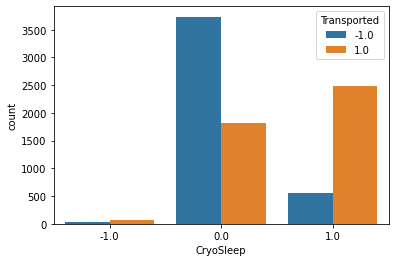

In [102]:
sb.countplot(da["CryoSleep"], hue = da["Transported"])

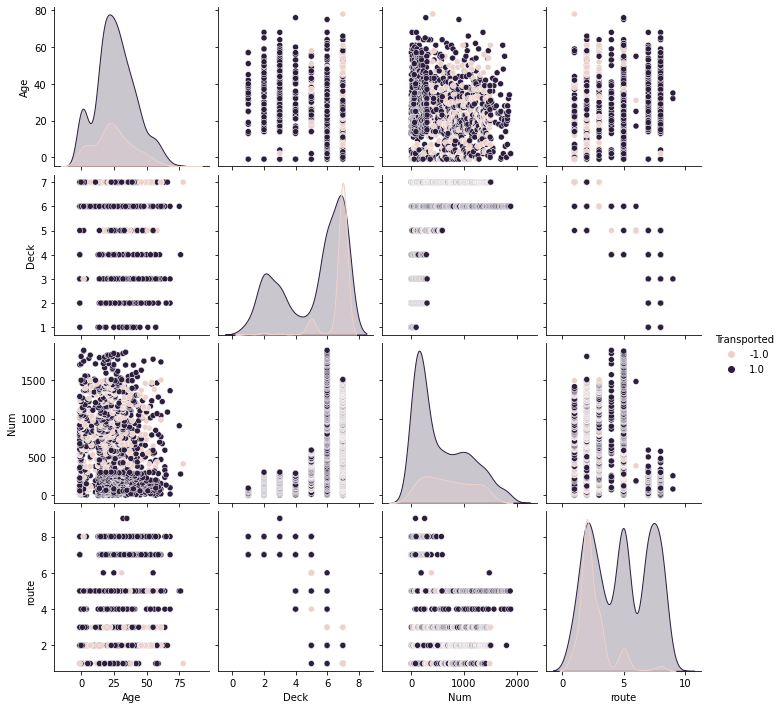

In [103]:
sb.pairplot(dr,hue = "Transported")

In [104]:
dr_=dr
arr = dr_["Num"]<1000
dr_["newNum"] = np.where(arr,1.0,0.0)

<ipython-input-104-0d88b7b9d155>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_["newNum"] = np.where(arr,1.0,0.0)


In [105]:
arr = dr_["Age"]>10
dr_["newAge"] = np.where(arr,1.0,0.0)

<ipython-input-105-091c6ee5415a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_["newAge"] = np.where(arr,1.0,0.0)


In [106]:
cols = ["Deck","route"]

for col in cols:
    m = dr_[col].median()
    for i in dr_.index:
        dr_.loc[i,col] /= m
cols.append("newNum")
cols.append("newAge")

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-106-c50d1b56f548>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m


In [107]:
ppn3 = ds.divide_frame(dataf = dr_,columns = cols,teacher_column = "Transported",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

test size:  422 , total errors in test: 22.75%
index = predicted, columns = factual, in %:
         -1        1
-1        0        0
 1  22.7488  77.2512


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


In [108]:
error = ppn3.predict(dr_.loc[:,cols])!=dr_.loc[:,"Transported"]
error.sum()/len(error)

0.22301136363636365

5) "VIP"==0.0 "Side"==1.0 "CryoSleep"==1.0  ==> Deck + route ==> Transported/Not

In [109]:
dr = dtmp[(dtmp["VIP"]==1.0)&(dtmp["Side"]==1.0)&(dtmp["CryoSleep"]==1.0)]
dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)
dr.shape

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(9, 5)

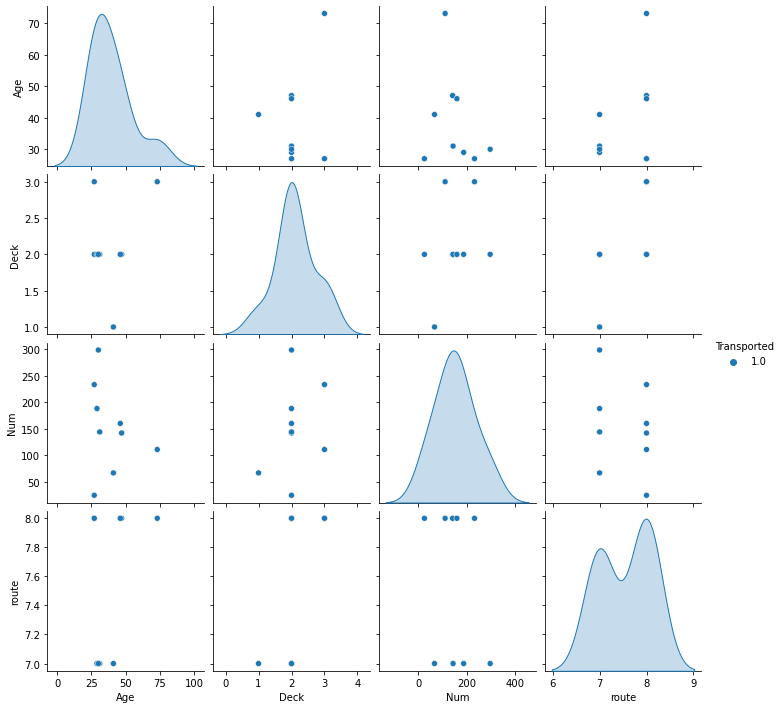

In [110]:
sb.pairplot(dr,hue = "Transported")

6) "VIP"==1.0 "Side"==1.0 "CryoSleep"==1.0  ==> Transported

In [111]:
dr = dtmp[(dtmp["VIP"]==0.0)&(dtmp["Side"]==2.0)&(dtmp["CryoSleep"]==1.0)]
dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)
dr.shape

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1518, 5)

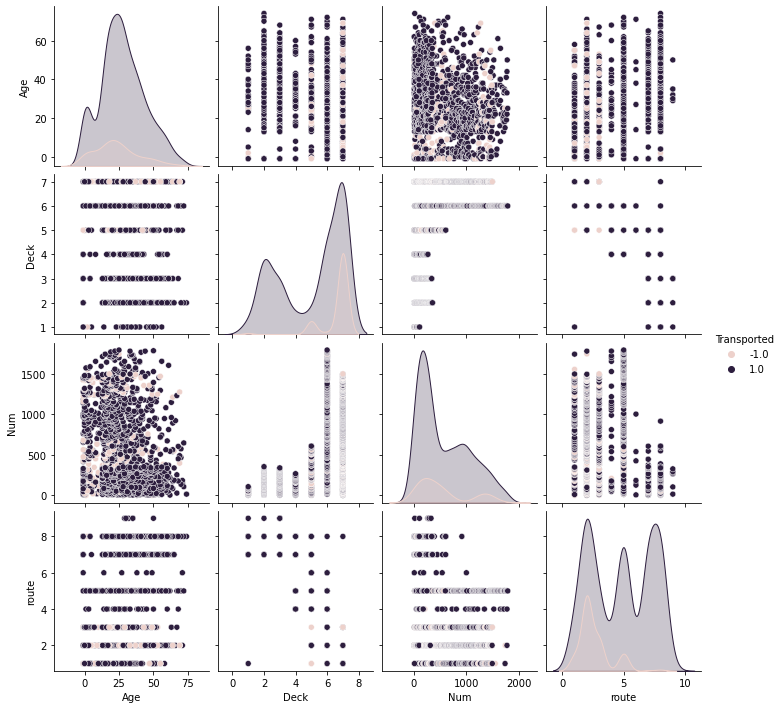

In [112]:
sb.pairplot(dr,hue = "Transported")

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='route', ylabel='count'>

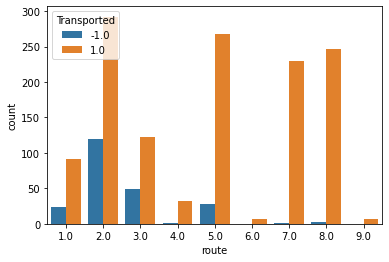

In [113]:
sb.countplot(dr["route"], hue = dr["Transported"])

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deck', ylabel='count'>

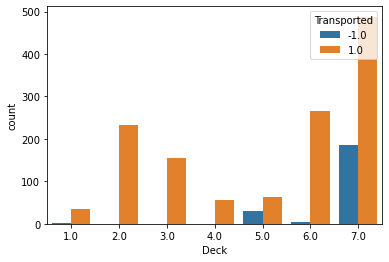

In [114]:
sb.countplot(dr["Deck"], hue = dr["Transported"])

In [115]:
Deck_set = {1.0, 2.0, 3.0, 4.0, 6.0}
route_set = {4.0, 6.0, 7.0, 8.0, 9.0}

deck_arr = (dr["Deck"] == 1.0)|(dr["Deck"] == 2.0)|(dr["Deck"] == 3.0)|(dr["Deck"] == 4.0)|(dr["Deck"] == 6.0)
route_arr = (dr["route"] == 4.0)|(dr["route"] == 6.0)|(dr["route"] == 7.0)|(dr["route"] == 8.0)|(dr["route"] == 9.0)

dr_ = dr[~(deck_arr | route_arr)]

arr = (dr_["Num"]>700) & (dr_["Num"]<1300)
dr_["newNum"] = np.where(arr,1.0,0.0)

dr_ = dr_[dr_["newNum"] ==0.0] 
dr_.shape

<ipython-input-115-2ac7612aba96>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_["newNum"] = np.where(arr,1.0,0.0)


(471, 6)

In [116]:
pd.value_counts(dr_["Transported"])

 1.0    278
-1.0    193
Name: Transported, dtype: int64

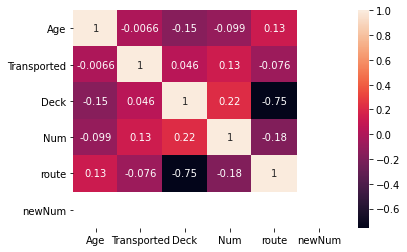

In [117]:
corrMatrix = dr_.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


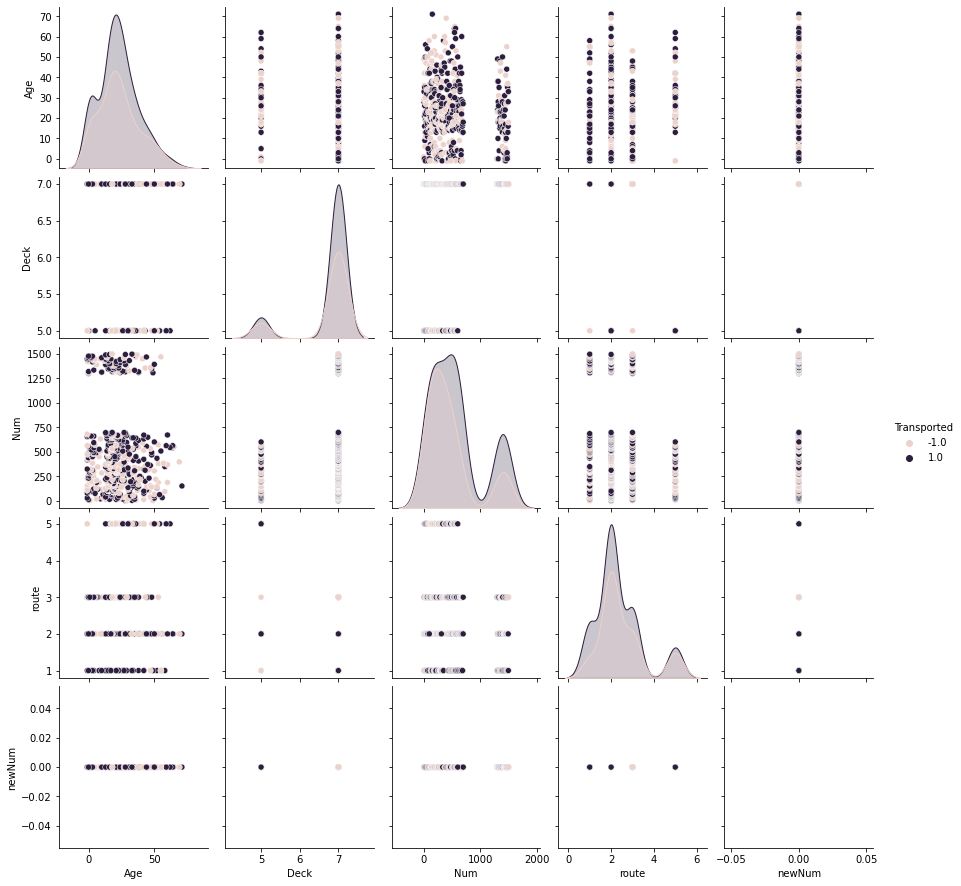

In [118]:
sb.pairplot(dr_,hue = "Transported")

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='route', ylabel='count'>

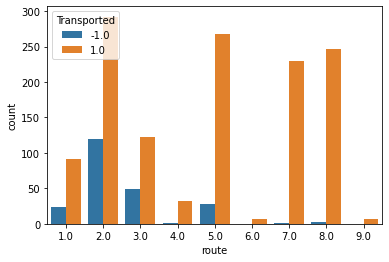

In [119]:
sb.countplot(dr["route"], hue = dr["Transported"])

7) "VIP"==0.0 "Side"==2.0 "CryoSleep"==1.0  ==> (Deck , route) 4 pairs ==> Transported/Not

In [120]:
dr = dtmp[(dtmp["VIP"]==1.0)&(dtmp["Side"]==2.0)&(dtmp["CryoSleep"]==1.0)]
dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)
dr.shape

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(12, 5)

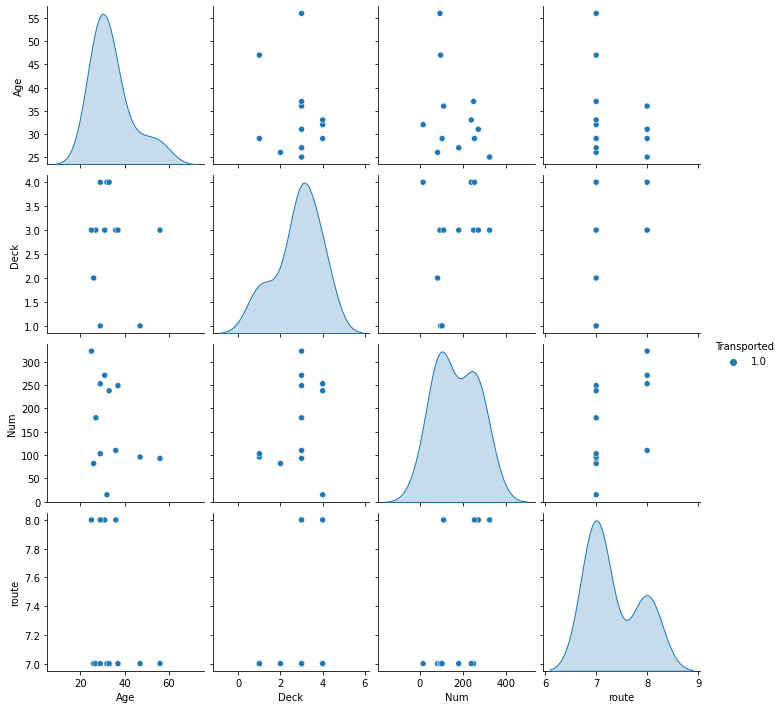

In [121]:
sb.pairplot(dr,hue = "Transported")

8) "VIP"==1.0 "Side"==2.0 "CryoSleep"==1.0  ==> Transported

In [122]:
def model(df):
        d = df[(df["Side"]==1.0)&(df["CryoSleep"]==0.0)]
        d1 = d[(d["FoodCourt"]>1)|(d["Spa"]>1)|(d["RoomService"]>1)|(d["VRDeck"]>1)]
        cols = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]

        for col in cols:
                m = d1[col].median()
                for i in d1.index:
                        d1.loc[i,col] /= m
                
        d1["prediction"] = ppn1.predict(d1.loc[:,cols])
        
        d1_rest = d[(d["FoodCourt"]<=1)&(d["Spa"]<=1)&(d["RoomService"]<=1)&(d["VRDeck"]<=1)]
        d1_rest["prediction"] = 1.0
        d = df[(df["Side"]==2.0)&(df["CryoSleep"]==0.0)]
        d2 = d[(d["FoodCourt"]>1)|(d["Spa"]>1)|(d["RoomService"]>1)|(d["VRDeck"]>1)]
        cols = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]

        for col in cols:
                m = d2[col].median()
                for i in d2.index:
                        d2.loc[i,col] /= m
                
        cols.append("newNum")
        
        arr = (d2["Num"]>750) & (d2["Num"]<1250)
        d2["newNum"] = np.where(arr,1.0,0.0)
            
        d2["prediction"] = ppn2.predict(d2.loc[:,cols])
        d2_rest =  d[(d["FoodCourt"]<=1)&(d["Spa"]<=1)&(d["RoomService"]<=1)&(d["VRDeck"]<=1)]
        d2_rest["prediction"] = 1.0
        
        d3 = df[(df["VIP"]==0.0)&(df["Side"]==1.0)&(df["CryoSleep"]==1.0)]
        arr = d3["Num"]<1000
        d3["newNum"] = np.where(arr,1.0,0.0)
        arr = d3["Age"]>10
        d3["newAge"] = np.where(arr,1.0,0.0)
        
        cols = ["Deck","route"]

        for col in cols:
                m = d3[col].median()
                for i in d3.index:
                        d3.loc[i,col] /= m
        print("3.8")
        cols.append("newNum")
        cols.append("newAge")
          
        d3["prediction"] = ppn3.predict(d3.loc[:,cols])
        
        d4 = df[(df["VIP"]==0.0)&(df["Side"]==2.0)&(df["CryoSleep"]==1.0)]

        deck_arr = (df["Deck"] == 1.0)|(df["Deck"] == 2.0)|(df["Deck"] == 3.0)|(df["Deck"] == 4.0)|(df["Deck"] == 6.0)
        route_arr = (df["route"] == 4.0)|(df["route"] == 6.0)|(df["route"] == 7.0)|(df["route"] == 8.0)|(df["route"] == 9.0)
        print("5")

        d4_1 = d4[deck_arr | route_arr]
        d4_1["prediction"] = 1.0
        
        d4_2 = d4[~(deck_arr | route_arr)]
        d4_2["prediction"] = 1.0 #(471)

        arr = (dr_["Num"]>700) & (dr_["Num"]<1300)
        dr_["newNum"] = np.where(arr,1.0,0.0)
        
        d5 = df[(df["VIP"]==1.0)&(df["CryoSleep"]==1.0)]
        d5["prediction"] = 1.0
          
        result = d1.append(d1_rest).append(d2).append(d2_rest).append(d3).append(d4_1).append(d4_2).append(d5)
        
        return result
        
        
        

In [123]:
def clean(df):
    for j in df.columns:
        for i in df.index:
            if df.loc[i,j] == -1.0:
                df.loc[i,j] = 0.0
    return df

In [124]:
dtmp.head(10)

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0        0.0  39.0  0.0          0.0        0.0           0.0     0.0     0.0   
1        0.0  24.0  0.0        109.0        9.0          25.0   549.0    44.0   
2        0.0  58.0  1.0         43.0     3576.0           0.0  6715.0    49.0   
3        0.0  33.0  0.0          0.0     1283.0         371.0  3329.0   193.0   
4        0.0  16.0  0.0        303.0       70.0         151.0   565.0     2.0   
5        0.0  44.0  0.0          0.0      483.0           0.0   291.0     0.0   
6        0.0  26.0  0.0         42.0     1539.0           3.0     0.0     0.0   
7        1.0  28.0  0.0          0.0        0.0           0.0     0.0     0.0   
8        0.0  35.0  0.0          0.0      785.0          17.0   216.0     0.0   
9        1.0  14.0  0.0          0.0        0.0           0.0     0.0     0.0   

   Transported  Deck  Num  Side  route  
0         -1.0   2.0  0.0   1.0    8.0  
1          1.0   6.0  0.0   2.0    2.0  
2         -1.0   1.0  0.0   2.0    8.0  
3         -1.0   1.0  0.0   2.0    8.0  
4          1.0   6.0  1.0   2.0    2.0  
5          1.0   6.0  0.0   1.0    3.0  
6          1.0   6.0  2.0   2.0    2.0  
7          1.0   7.0  0.0   2.0    2.0  
8          1.0   6.0  3.0   2.0    2.0  
9          1.0   2.0  1.0   1.0    7.0

In [125]:
result = clean(dtmp)

result = model(result)

result.shape

error = result["prediction"]!=dtmp["Transported"]
error.sum()/len(error)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-122-9646d56b8f28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.loc[i,col] /= m
<ipython-input-122-9646d56b8f28>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1["prediction"] = ppn1.

3.8
5


<ipython-input-122-9646d56b8f28>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3["prediction"] = ppn3.predict(d3.loc[:,cols])
<ipython-input-122-9646d56b8f28>:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d4_1 = d4[deck_arr | route_arr]
<ipython-input-122-9646d56b8f28>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4_1["prediction"] = 1.0
<ipython-input-122-9646d56b8f28>:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d4_2 = d4[~

ValueError: Can only compare identically-labeled Series objects

In [ ]:
dtmp.shape

(8693, 13)

In [ ]:
result.shape

(8494, 16)